#I. Perkenalan
Nama: Hafidz Muta'ali

Batch : 006

Milestone 1

#II. Import Library dan Data Preprocessing

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hafidzali04/Hacktiv8-phase0/main/data/supermarket_sales%20.csv')
data #Menampilkan data yang sudah diload

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data['Date'] = data.Date.astype('datetime64[ns]') #Mengubah tipe data Date

In [ ]:
#Mengambil data hour and day dari datetime
data['Hour'] = pd.DatetimeIndex(data['Time']).hour
data['Day'] = pd.DatetimeIndex(data['Date']).day


In [ ]:
data.isnull().sum() #Memeriksa apakah ada data yang kosong

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Hour                       0
Day                        0
dtype: int64

#III. EDA (Exploratory Data Analysis)


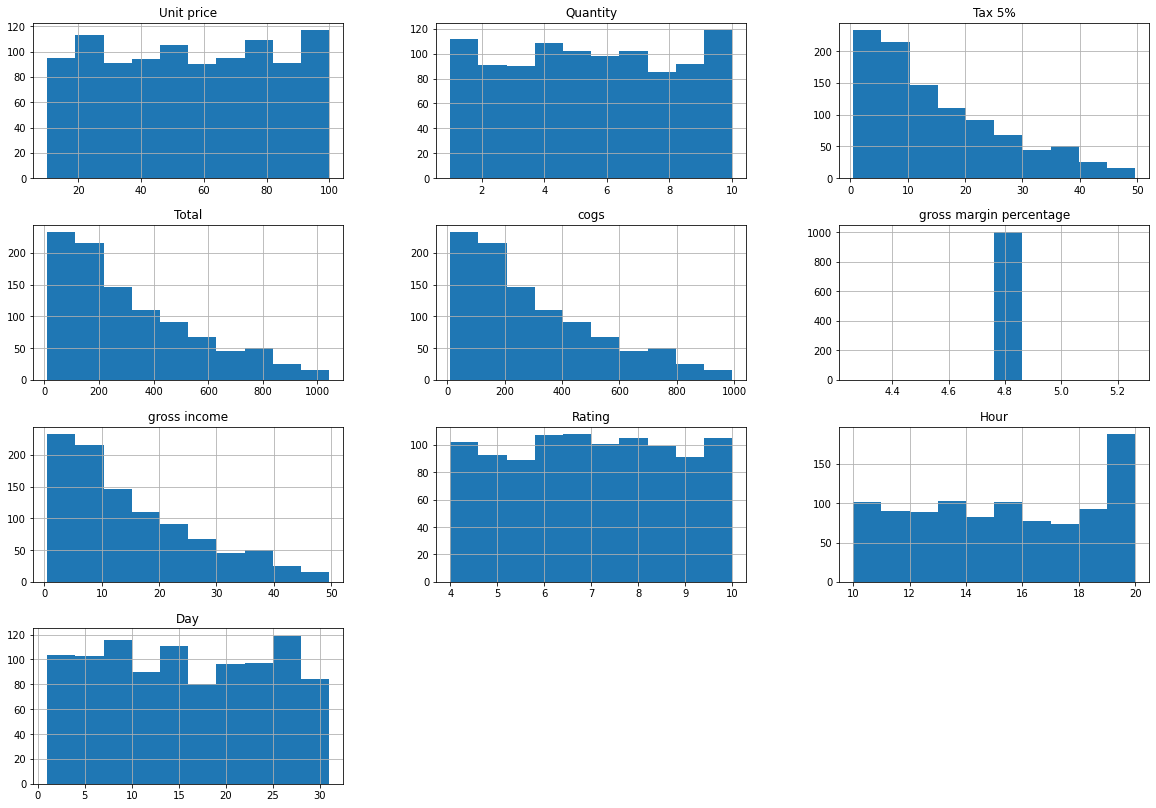

In [ ]:
data.hist(figsize=(20,14))
plt.show()

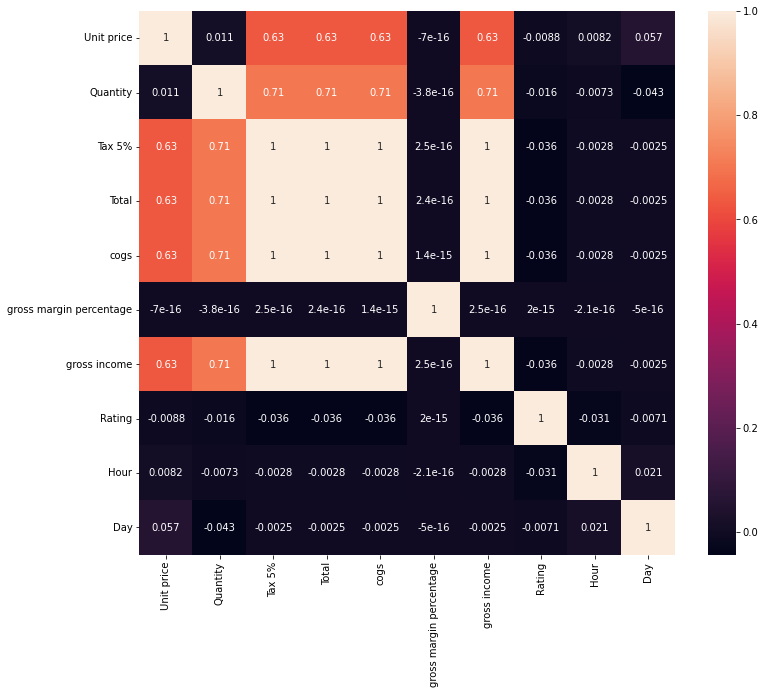

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

##Store Review

In [ ]:
#Menghitung Pendapatan 
gross = round(data['gross income'].sum())
print(gross)

income = round(data['Total'].sum())
print(income)
modal = round(data['cogs'].sum())
print(modal)

15379
322967
307587


In [ ]:
#Filter City
city1 = data[data['City']=='Yangon']
city2 = data[data['City']=='Mandalay']
city3 = data[data['City']=='Naypyitaw']

Text(0, 0.5, 'Quantity')

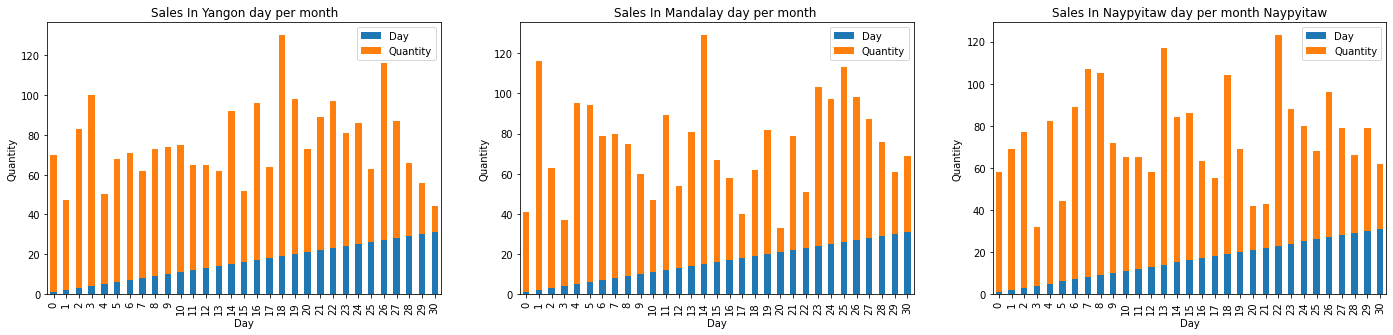

In [ ]:
#Month Sales
fig1,ax1 = plt.subplots(ncols=3,nrows=1,figsize=(24,5)) #Definisikan figure dan sumbu (axes), analogi figure adalah kertas, ax adalah sumbu tempat kita menggambar grafik

#data[data['City'] == 'Mandalay'].groupby(['Day'])['Quantity'].sum().reset_index().plot(kind='bar',ax=ax1, stacked=True)


dayc1 = city1.groupby(['Day'])['Quantity'].sum().reset_index()
dayc1.plot(kind='bar',ax=ax1[0], stacked=True)


dayc2= city2.groupby(['Day'])['Quantity'].sum().reset_index()
dayc2.plot(kind='bar',ax=ax1[1], stacked=True)


dayc3 = city3.groupby(['Day'])['Quantity'].sum().reset_index()
dayc3.plot(kind='bar',ax=ax1[2], stacked=True)

ax1[0].set_title('Sales In Yangon day per month')
ax1[0].set_xlabel('Day') #Set keterangan sumbu x
ax1[0].set_ylabel('Quantity') #Set keterangan sumbu y

ax1[1].set_title('Sales In Mandalay day per month ')
ax1[1].set_xlabel('Day') #Set keterangan sumbu x
ax1[1].set_ylabel('Quantity') #Set keterangan sumbu y

ax1[2].set_title('Sales In Naypyitaw day per month Naypyitaw')
ax1[2].set_xlabel('Day') #Set keterangan sumbu x
ax1[2].set_ylabel('Quantity') #Set keterangan sumbu y

Text(0, 0.5, 'Profit')

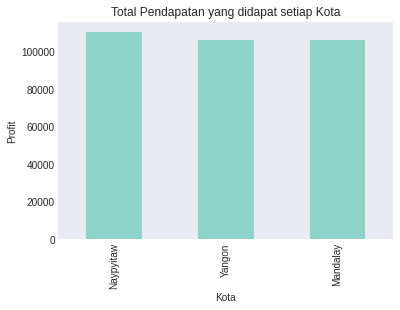

In [ ]:
#Income City
fig1,ax1 = plt.subplots() #Definisikan figure dan sumbu (axes), analogi figure adalah kertas, ax adalah sumbu tempat kita menggambar grafik

data.groupby('City').sum()['Total'].sort_values(ascending=False).plot(kind='bar',ax=ax1)
plt.style.use('seaborn-dark')
ax1.set_title('Total Pendapatan yang didapat setiap Kota') #set judul grafik
ax1.set_xlabel('Kota') #Set keterangan sumbu x
ax1.set_ylabel('Profit') #Set keterangan sumbu y

In [ ]:
i=data.groupby('City')['Customer type'].value_counts() #Total pembeli berdasarkan customer Type
print(i)


City       Customer type
Mandalay   Normal           167
           Member           165
Naypyitaw  Member           169
           Normal           159
Yangon     Normal           173
           Member           167
Name: Customer type, dtype: int64


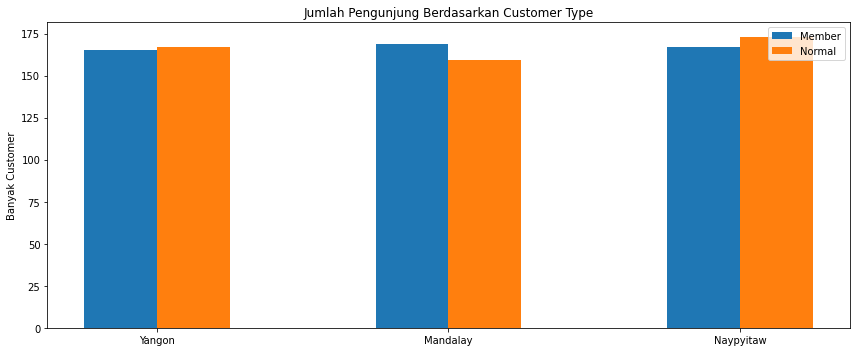

In [ ]:
#Type Of Customer
city = data['City'].value_counts()
labels = city.index
i=data.groupby('City')['Customer type'].value_counts()

member= [i.values[1], i.values[2], i.values[5]]
normal = [i.values[0],i.values[3],i.values[4]]

i = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig5, ax5 = plt.subplots(figsize=(12,5))
rects1 = ax5.bar(i - width/2, member, width, label='Member')
rects2 = ax5.bar(i + width/2, normal, width, label='Normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax5.set_ylabel('Banyak Customer')
ax5.set_title('Jumlah Pengunjung Berdasarkan Customer Type')
ax5.set_xticks(i)
ax5.set_xticklabels(labels)
ax5.legend()

fig5.tight_layout()

plt.show()

In [ ]:
print('Rata rata rating keseluruhan Store: ',round(data['Rating'].mean(),1)) #melihat ratings store keseluruhan
print(round(data.groupby('City').mean()['Rating'].sort_values(ascending=False),1))

Rata rata rating keseluruhan Store:  7.0
City
Naypyitaw    7.1
Yangon       7.0
Mandalay     6.8
Name: Rating, dtype: float64


Text(0, 0.5, 'Ratings')

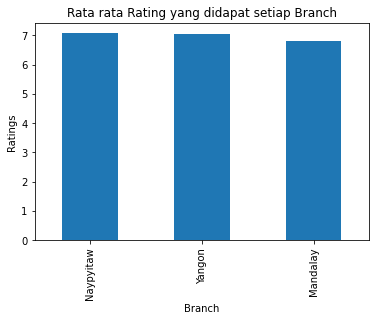

In [ ]:
#Ratings Store
fig2,ax2 = plt.subplots() #Definisikan figure dan sumbu (axes), analogi figure adalah kertas, ax adalah sumbu tempat kita menggambar grafik

data.groupby('City').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',ax=ax2)

ax2.set_title('Rata rata Rating yang didapat setiap Branch') #set judul grafik
ax2.set_xlabel('Branch') #Set keterangan sumbu x
ax2.set_ylabel('Ratings') #Set keterangan sumbu y

Text(0.5, 1.0, 'Metode Pembayaran di Kota Naypyitaw')

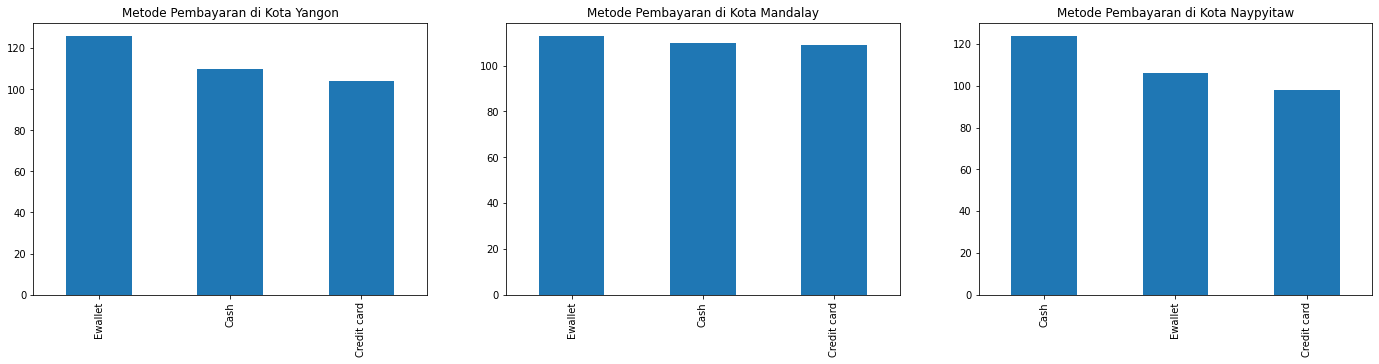

In [ ]:
#Metode Pembayaran
fig3,ax3 = plt.subplots(ncols=3,nrows=1,figsize=(24,5)) #ncols adalah jumlah kolom dan nrows adalah jumlah baris. Output ax2 adalah list yang jumlah elemennya sebanyak ncols*nrows


payment1 = city1['Payment'].value_counts() #Hitung frekuensi respon price factor
payment1.plot(kind='bar',ax=ax3[0])


Payment2 = city2['Payment'].value_counts()
Payment2.plot(kind='bar',ax=ax3[1])


Payment3 = city3['Payment'].value_counts()
Payment3.plot(kind='bar',ax=ax3[2])

ax3[0].set_title('Metode Pembayaran di Kota Yangon')
ax3[1].set_title('Metode Pembayaran di Kota Mandalay')
ax3[2].set_title('Metode Pembayaran di Kota Naypyitaw')

Text(0.5, 1.0, 'Total Pendapatan berdasarkan product line di kota  Naypyitaw')

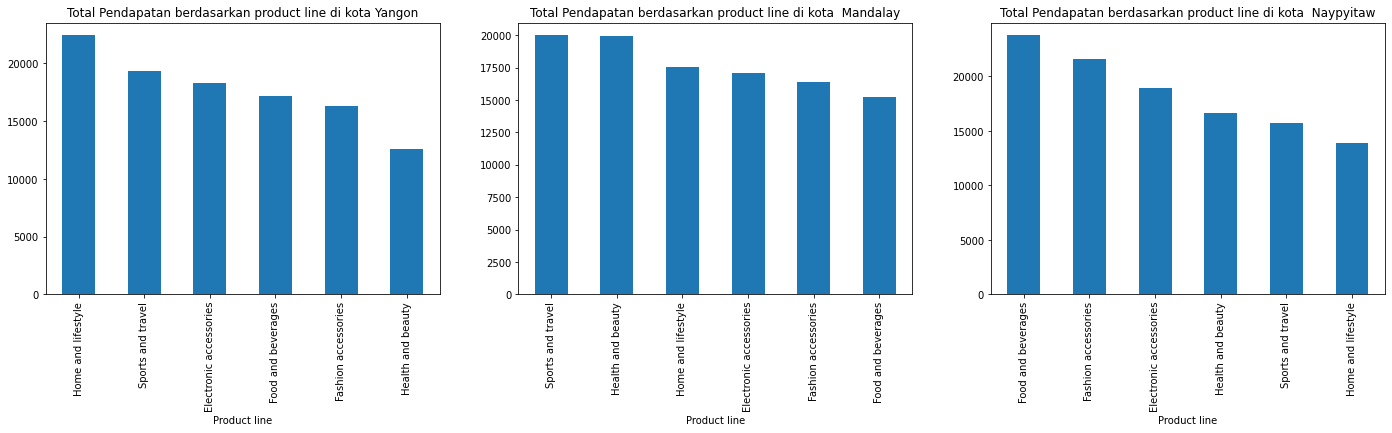

In [ ]:
#Total Income base on product line 
fig4,ax4 = plt.subplots(ncols=3,nrows=1,figsize=(24,5)) #ncols adalah jumlah kolom dan nrows adalah jumlah baris. Output ax2 adalah list yang jumlah elemennya sebanyak ncols*nrows


payment1 = data[data['City']=='Yangon'].groupby('Product line').sum()['Total'].sort_values(ascending=False) #Hitung frekuensi respon price factor
payment1.plot(kind='bar',ax=ax4[0])


Payment2 = data[data['City']=='Mandalay'].groupby('Product line').sum()['Total'].sort_values(ascending=False)
Payment2.plot(kind='bar',ax=ax4[1])


Payment3 = data[data['City']=='Naypyitaw'].groupby('Product line').sum()['Total'].sort_values(ascending=False)
Payment3.plot(kind='bar',ax=ax4[2])

ax4[0].set_title('Total Pendapatan berdasarkan product line di kota Yangon')
ax4[1].set_title('Total Pendapatan berdasarkan product line di kota  Mandalay')
ax4[2].set_title('Total Pendapatan berdasarkan product line di kota  Naypyitaw')

##Customer Behavior

In [ ]:
#Mencari Pengunjung Di Setiap Kota 
x=data.groupby(['City']).Gender.value_counts()
print(x)
x.values[0]

City       Gender
Mandalay   Male      170
           Female    162
Naypyitaw  Female    178
           Male      150
Yangon     Male      179
           Female    161
Name: Gender, dtype: int64


170

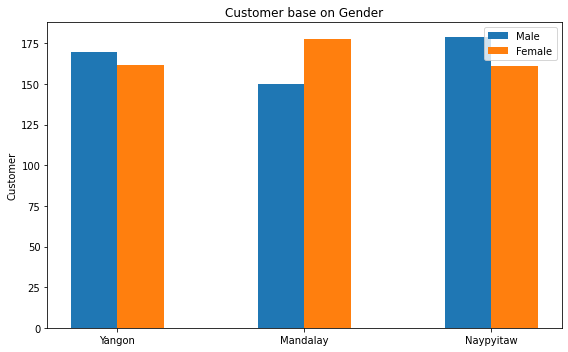

In [ ]:
#Customer base on Gender
city = data['City'].value_counts()
labels = city.index
x=data.groupby(['City']).Gender.value_counts()

male = [x.values[0], x.values[3], x.values[4]]
female = [x.values[1],x.values[2],x.values[5]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig5, ax5 = plt.subplots(figsize=(8,5))
rects1 = ax5.bar(x - width/2, male, width, label='Male')
rects2 = ax5.bar(x + width/2, female, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax5.set_ylabel('Customer')
ax5.set_title('Customer base on Gender')
ax5.set_xticks(x)
ax5.set_xticklabels(labels)
ax5.legend()

fig5.tight_layout()

plt.show()

In [ ]:
#filter gender
male = data[data['Gender']=='Male']
female = data[data['Gender']=='Female']

In [ ]:
#Rata-rata Male Ratings Product
mrating=round(male.groupby('Product line').mean()['Rating'].sort_values(),1)
mrating

Product line
Health and beauty         6.9
Home and lifestyle        6.9
Fashion accessories       6.9
Food and beverages        7.0
Electronic accessories    7.1
Sports and travel         7.1
Name: Rating, dtype: float64

Text(0, 0.5, 'Product')

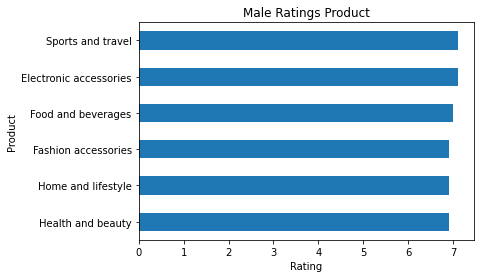

In [ ]:
#Male Ratings Product
fig6,ax6 = plt.subplots() #Definisikan figure dan sumbu (axes), analogi figure adalah kertas, ax adalah sumbu tempat kita menggambar grafik

mrating.plot(kind='barh',ax=ax6)

ax6.set_title('Male Ratings Product') #set judul grafik
ax6.set_xlabel('Rating') #Set keterangan sumbu x
ax6.set_ylabel('Product') #Set keterangan sumbu y

In [ ]:
#Rata-rata Female Ratings Product
frating=round(female.groupby('Product line').mean()['Rating'].sort_values(),1)
frating

Product line
Home and lifestyle        6.8
Sports and travel         6.8
Electronic accessories    6.8
Fashion accessories       7.1
Health and beauty         7.1
Food and beverages        7.2
Name: Rating, dtype: float64

Text(0, 0.5, 'Product')

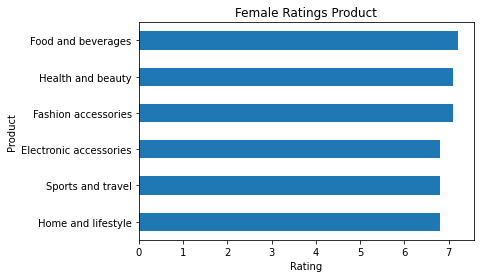

In [ ]:
#Female Ratings Product
fig7,ax7 = plt.subplots() #Definisikan figure dan sumbu (axes), analogi figure adalah kertas, ax adalah sumbu tempat kita menggambar grafik

frating.plot(kind='barh',ax=ax7)

ax7.set_title('Female Ratings Product') #set judul grafik
ax7.set_xlabel('Rating') #Set keterangan sumbu x
ax7.set_ylabel('Product') #Set keterangan sumbu y

Text(0.5, 1.0, 'Female and Product')

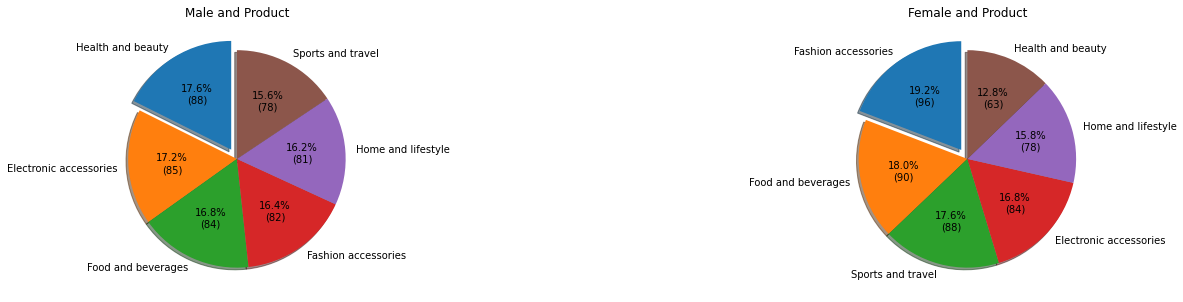

In [ ]:
#Customer Total Transaction
fig8,ax8 = plt.subplots(ncols=2,nrows=1,figsize=(24,5)) #ncols adalah jumlah kolom dan nrows adalah jumlah baris. Output ax2 adalah list yang jumlah elemennya sebanyak ncols*nrows
#=====Male Chart=====
product_male = male['Product line'].value_counts() #Hitung product yang dibeli berdasarkan gender
labelsm=product_male.index
explode = (0.1, 0, 0, 0, 0, 0)
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
ax8[0].pie(product_male,explode=explode, labels=labelsm, autopct = lambda pct: func(pct, product_male),
        shadow=True, startangle=90)

#=====Female Chart=====
product_female = female['Product line'].value_counts() #Hitung product yang dibeli berdasarkan gender
labelsf=product_female.index
ax8[1].pie(product_female,explode=explode, labels=labelsf, autopct = lambda pct: func(pct, product_female),
        shadow=True, startangle=90)



ax8[0].set_title('Male and Product')
ax8[1].set_title('Female and Product')

Text(0.5, 1.0, 'Customers Female Spend across Product Line')

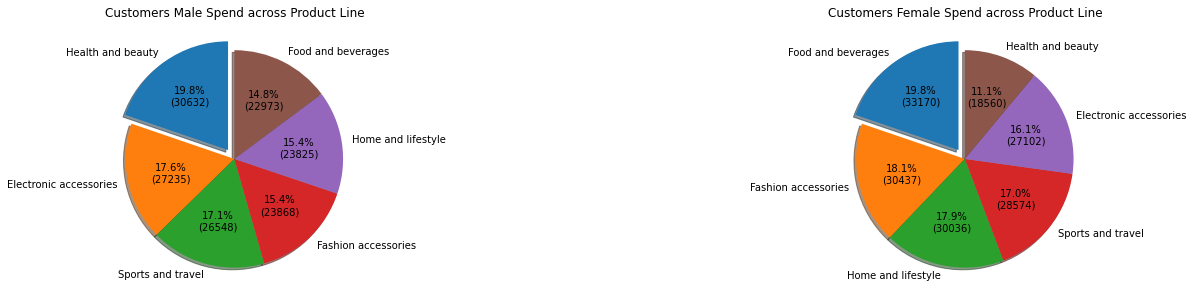

In [ ]:
#Customers Spend across Product Line
fig9,ax9 = plt.subplots(ncols=2,nrows=1,figsize=(24,5)) #ncols adalah jumlah kolom dan nrows adalah jumlah baris. Output ax2 adalah list yang jumlah elemennya sebanyak ncols*nrows
#=====Male Chart=====
profit_male = male.groupby('Product line').sum()['Total'].sort_values(ascending=False)#Hitung product yang dibeli berdasarkan gender
labelsm=profit_male.index
explode = (0.1, 0, 0, 0, 0, 0)
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

ax9[0].pie(profit_male,explode=explode, labels=labelsm, autopct = lambda pct: func(pct, profit_male),
        shadow=True, startangle=90)

#=====Female Chart=====
profit_female = female.groupby('Product line').sum()['Total'].sort_values(ascending=False)
labelsf=profit_female.index
ax9[1].pie(profit_female,explode=explode, labels=labelsf, autopct = lambda pct: func(pct, profit_female),
        shadow=True, startangle=90)



ax9[0].set_title('Customers Male Spend across Product Line')
ax9[1].set_title('Customers Female Spend across Product Line')

In [ ]:
#Transaksi terbesar dari pelanggan Male
transmale=round(male.groupby('Product line').max()['Total'].sort_values(ascending=True),2)
print(transmale)

Product line
Electronic accessories     931.04
Food and beverages         939.54
Sports and travel          944.62
Health and beauty          950.25
Home and lifestyle        1023.75
Fashion accessories       1039.29
Name: Total, dtype: float64


In [ ]:
transfemale=round(female.groupby('Product line').max()['Total'].sort_values(ascending=True),2)
print(transfemale)

Product line
Health and beauty          794.65
Electronic accessories     942.45
Sports and travel         1002.12
Home and lifestyle        1022.49
Food and beverages        1034.46
Fashion accessories       1042.65
Name: Total, dtype: float64


Text(0.5, 1.0, 'Highest Spend Product Line by Female Customer')

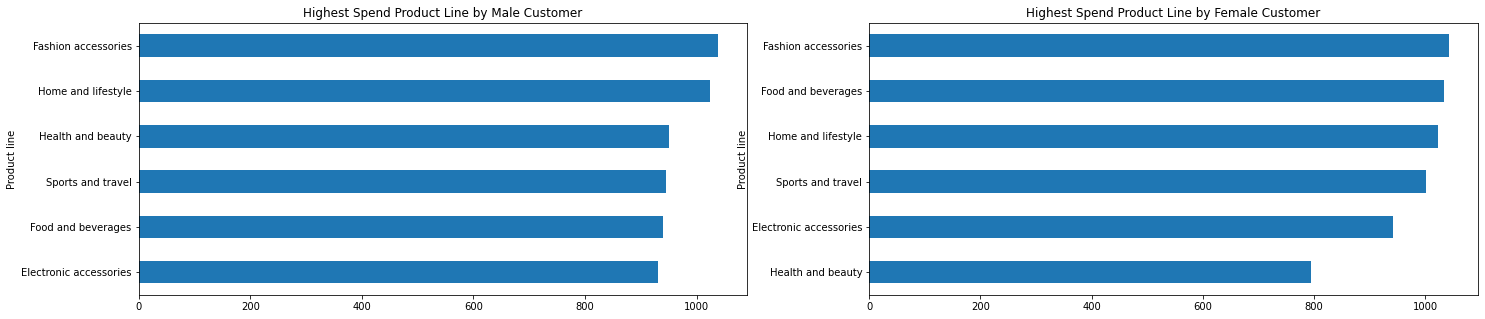

In [ ]:
fig10,ax10 = plt.subplots(ncols=2,nrows=1,figsize=(24,5)) #ncols adalah jumlah kolom dan nrows adalah jumlah baris. Output ax2 adalah list yang jumlah elemennya sebanyak ncols*nrows


transmale.plot(kind='barh',ax=ax10[0])
transfemale.plot(kind='barh',ax=ax10[1])


ax10[0].set_title('Highest Spend Product Line by Male Customer')
ax10[1].set_title('Highest Spend Product Line by Female Customer')


Text(0.5, 1.0, 'Payment Method By Female Customer')

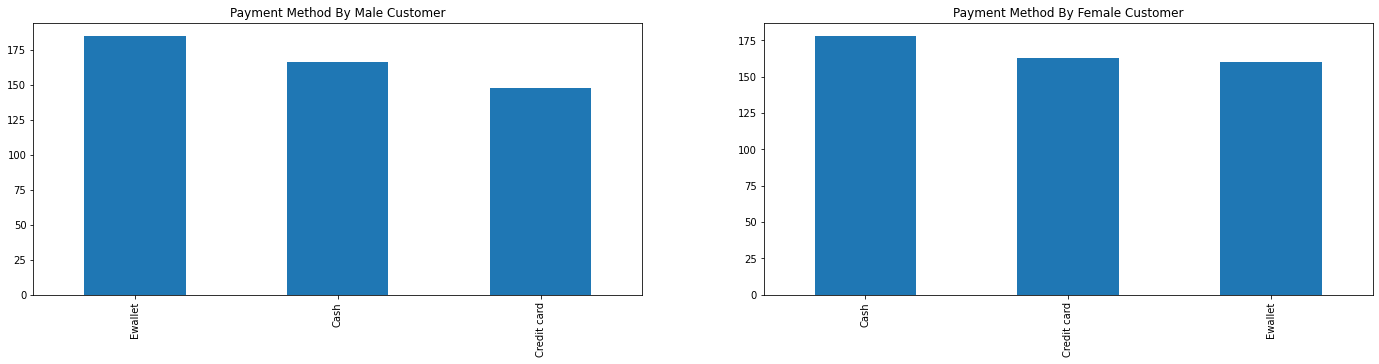

In [ ]:
#Metode Pembayaran berdasarkan Gender
fig11,ax11 = plt.subplots(ncols=2,nrows=1,figsize=(24,5)) #ncols adalah jumlah kolom dan nrows adalah jumlah baris. Output ax2 adalah list yang jumlah elemennya sebanyak ncols*nrows


paymentg1 = male['Payment'].value_counts() #Hitung frekuensi respon price factor
paymentg1.plot(kind='bar',ax=ax11[0])


Paymentg2 = female['Payment'].value_counts()
Paymentg2.plot(kind='bar',ax=ax11[1])


ax11[0].set_title('Payment Method By Male Customer')
ax11[1].set_title('Payment Method By Female Customer')


#IV. Hypothesis Testing

##Two Samples Independent Two Tailed Hypothesis Testing
Now, we want to check, whether daily average of sales of two store are significantly different or not

**H0: μ_Yangon= μ_Naypyitaw**

**H1: μ_Yangon != μ_Naypyitaw**

In [ ]:
daily_yangon = city1[['Date','Total']].groupby('Date').sum().sample(80)
daily_nay = city3[['Date','Total']].groupby('Date').sum().sample(80)
print('Average sales of Yangon a day: {}'.format(np.round(daily_yangon.Total.mean())))
print('Average sales of Naypyitaw a day: {}'.format(np.round(daily_nay.Total.mean())))

Average sales of Yangon a day: 1173.0
Average sales of Naypyitaw a day: 1253.0


In [ ]:
t_stat, p_val = stats.ttest_ind(daily_yangon,daily_nay)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.5057089658715626
t-statistics: -0.6670566304765039


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


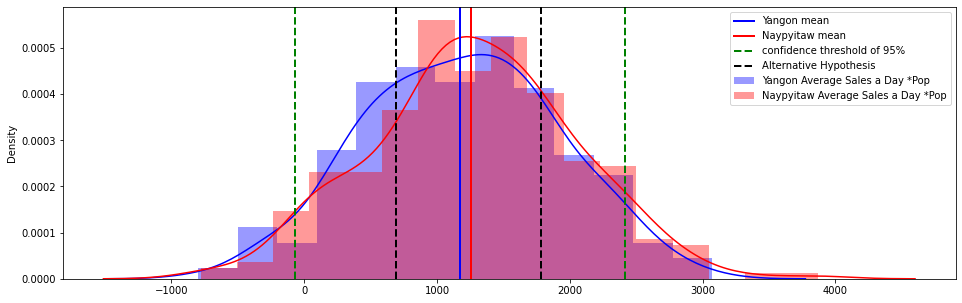

In [ ]:
yangon_pop = np.random.normal(daily_yangon.Total.mean(),daily_yangon.Total.std(),300)
nay_pop = np.random.normal(daily_nay.Total.mean(),daily_nay.Total.std(),300)

ci = stats.norm.interval(0.90, daily_yangon.Total.mean(),daily_yangon.Total.std())
plt.figure(figsize=(16,5))
sns.distplot(yangon_pop, label='Yangon Average Sales a Day *Pop',color='blue')
sns.distplot(nay_pop, label='Naypyitaw Average Sales a Day *Pop',color='red')

plt.axvline(daily_yangon.Total.mean(), color='blue', linewidth=2, label='Yangon mean')
plt.axvline(daily_nay.Total.mean(), color='red',  linewidth=2, label='Naypyitaw mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(yangon_pop.mean()+t_stat[0]*yangon_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(nay_pop.mean()-t_stat[0]*nay_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan nilai P_value yang dihasilkan  kita bisa terima hipotesis 0 bahwa penjualan di kota yangon tidak terlalu berbeda dari kota Naypyitaw